In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Matriz triangular superior

def TriangularSup(A, b):
  det = 1
  n = A.shape[0]
  x = np.zeros(n)
  tol = 0.0000001

  for i in reversed(range(n)): #Es la misma función que TriangularInf solo que empezamos de n a 0
    det *= A[i][i]

    if abs(det) < tol:
      print("No hay solución al sistema")
      return

    sum = 0
    for j in range(i, n):
      sum += x[j]*(A[i][j])

    x[i] = (b[i]- sum)/A[i][i]
  return x

In [ ]:
#Metodo de eliminación Gauss-Jordan

def GaussJordan(A_original, b_original):
  A = A_original.astype('float64')
  b = b_original.astype('float64')
  n = A.shape[0]
  tol = 1e-8

  for k in range(n):
    fila_pivote = k
    for j in range(k+1, n):
      if abs(A[j, k]) > abs(A[fila_pivote, k]):
        fila_pivote = j

      #Pivoteo
    A[[k, fila_pivote]] = A[[fila_pivote, k]] #intercambio la fila donde está el pivote mayor
    b[k], b[fila_pivote] = b[fila_pivote], b[k]

    # checar si pivote es practicasmente 0
    if abs(A[k, k ]) < tol:
      break
    for i in range(k+1, n):
      m_ik = A[i, k]/A[k, k]

      for j in range(k, n):
        A[i,j] = A[i, j] - m_ik*A[k, j]

      b[i] = b[i] - m_ik*b[k]

  #print(A)
  #print(b)

  return TriangularSup(A, b)

#Spline cúbico natural

Ejercicio 3

 (a) Determina el spline cúbico natural que pasa por los puntos $\{(-3,2)$, $(-2,0),(1,3),(4,1)\}$ y verifica las condiciones sobre la segunda derivada en los extremos dados por $S^{\prime \prime}(-3)=0=S^{\prime \prime }(4)$.

(b) Usa el spline para calcular el valor en las posiciones $x=0$ y $x=2$.

(c) Compara el resultado previo con el obtenido usando otro polinomio interpolador. Discute los resultados.


In [ ]:
#encuentra los coeficientes

def spline_cubico(x, y):
  n = len(x)
  h = np.zeros(n-1)
  beta = np.zeros(n-1)
  v = np.zeros(n-2)
  M = np.zeros((n-2, n-2))
  lmb = np.zeros(n)
  a = np.zeros(n-1)
  b = np.zeros(n-1)
  c = np.zeros(n-1)
  d = np.zeros(n-1)

  for i in range(n-1):
    h[i] = x[i+1] - x[i]
    beta[i] = (y[i+1]-y[i])/h[i]

  for k in range(n-2):
    v[k] = 6*(beta[k+1] -beta[k])

  for k in range(n-2):
    M[k,k] = 2*(h[k] + h[k+1])

    if k > 0:
      M[k, k-1] = h[k]

    if k<n-3:
      M[k, k +1] = h[k+1]

  lmb[1:-1] = np.linalg.solve(M, v)

  for i in range(n-1):
    a[i] = y[i]
    b[i] = beta[i] - (h[i]/6)*(2*lmb[i] + lmb[i+1])
    c[i] = lmb[i]/2
    d[i] = (lmb[i+1] - lmb[i])/(6*h[i])

  print(v)
  return M, a,b,c,d

In [ ]:
def Evaluacion_spline(t, x, a, b, c, d):
  n = len(x)
  i = 0
  while not (x[i] <= t <= x[i+1]):
    i += 1

  S = a[i] + b[i]*(t- x[i]) + c[i]*(t- x[i])**2 + d[i]*(t- x[i])**3
  return S

In [ ]:
x = np.array([-3, -2, 1, 4])
y = np.array([2, 0, 3, 1])

In [ ]:
M, a,b,c,d = spline_cubico(x,y)
print(M)

[ 18. -10.]
[[ 8.  3.]
 [ 3. 12.]]


In [ ]:
print(a, b, c, d)

[2. 0. 3.] [-2.47126437 -1.05747126  0.87356322] [ 0.          1.4137931  -0.77011494] [ 0.47126437 -0.24265645  0.08556833]


In [ ]:
for t in x:
  print(Evaluacion_spline(t, x, a, b, c, d))

2.0
0.0
3.0
1.0000000000000004


In [ ]:
print(Evaluacion_spline(0, x, a, b, c, d))

1.598978288633461


In [ ]:
print(Evaluacion_spline(2, x, a, b, c, d))

3.1890166028097062


<function matplotlib.pyplot.show(close=None, block=None)>

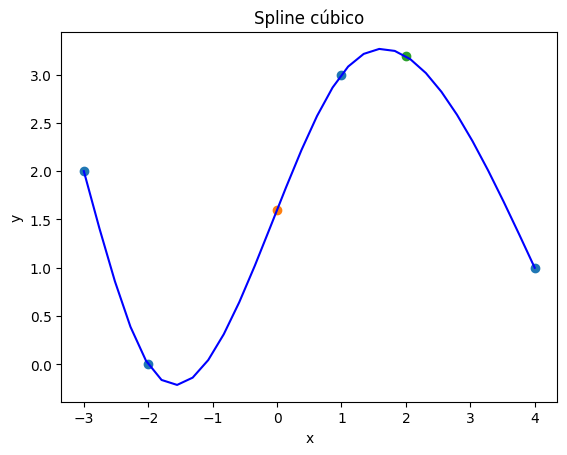

In [ ]:
x_conj = np.linspace(-3, 4, 30)
plt.plot(x_conj, [Evaluacion_spline(x0, x, a, b, c, d) for x0 in x_conj], "blue")
plt.scatter(x,y)

#puntos del Spline x=0 y x=2
plt.scatter(0,Evaluacion_spline(0, x, a, b, c, d))
plt.scatter(2,Evaluacion_spline(2, x, a, b, c, d))


plt.title("Spline cúbico")
plt.xlabel("x")
plt.ylabel("y")

plt.show

Polinomio de Lagrange interpolante.

$$P_n^L(x) = \sum_{i=0}^n f(x_i)L_i (x)$$

donde $L_i (x) = \Pi_{j = 0, j \neq i} \frac{x-x_j}{x_i - x_j}$


In [ ]:
def Lagrange(x, y, x0):
  P = 0
  n = len(x)

  for i in range(n):
    aux = 1

    for k in range(n):
      if i != k:

        aux = aux*(x0 - x[k])/(x[i] - x[k])

    P = P + y[i] * aux

  return P

<function matplotlib.pyplot.show(close=None, block=None)>

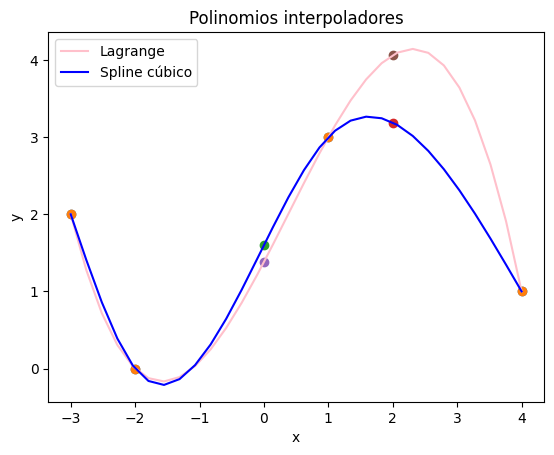

In [ ]:
x_conj = np.linspace(-3, 4, 30)
plt.plot(x_conj, [Lagrange(x, y, x0) for x0 in x_conj], "pink")
plt.plot(x_conj, [Evaluacion_spline(x0, x, a, b, c, d) for x0 in x_conj], "blue")
plt.scatter(x,y)
plt.scatter(x,y)

#puntos del Spline x=0 y x=2
plt.scatter(0,Evaluacion_spline(0, x, a, b, c, d))
plt.scatter(2,Evaluacion_spline(2, x, a, b, c, d))

#puntos de Lagrange x=0 y x=2
plt.scatter(0, Lagrange(x, y, 0))
plt.scatter(2, Lagrange(x, y, 2))

plt.legend(["Lagrange", "Spline cúbico"], loc ="upper left")
plt.title("Polinomios interpoladores")
plt.xlabel("x")
plt.ylabel("y")


plt.show

In [ ]:
Evaluacion_spline(0, x, a, b, c, d)-Lagrange(x, y, 0)

0.21802590768108

In [ ]:
Evaluacion_spline(2, x, a, b, c, d)-Lagrange(x, y, 2)

-0.8744754606823579

Ejercicio 4

La función $f(x)$ se conoce en los puntos $x_{k}$ dado en la tabla


|x | 0.0 | 0.25 | 0.5 | 0.75 | 1.0 |
|:---:|:---:|:---:|:---:|:---:|:---:|
|y| 1.000 | 1.015 | 1.006 | 0.882 | 0.670 |



Usa las fórmula de Newton Cotes Trapezoidal y de Simpson para aproximar la integral

$$
I=\int_{0}^{1} f(x) d x
$$

Da una estimación del error en cada caso.

Formula de Newton-Cotes trapezoidal

$$I={\displaystyle {\frac {1}{2}}h (f(x_0)+f(x_{n}) + 2\sum_{n=1}^{n-1}f(x_i))} $$



In [ ]:
def Newton_Cotes_Trapezoidal(x, y):
  n = len(x)
  sum = y[0] + y[n-1]
  h = x[1] - x[0]

  for i in range(1,n-1):
    sum += 2*y[i]

  return (h/2)*sum

Formula Newton-Cotes-Simpson

$$I={\displaystyle {\frac {1}{3}}h(f(x_{0})+4\sum _{i=1}^{n-1} f(x_{i})+f(x_{n}))}$$


In [ ]:
#Solo se puede aplicar para el caso de número de nodos pares
#Notar que se consideran los nodos ordenados
def Newton_Cotes_Simpson(x, y):
  n = len(x)
  h = x[1] - x[0]

  if (n-1) % 2 == 0:
    sum = y[0] + y[n-1]

    for i in range(1, n-1):
      if i % 2 == 0:
        sum += 2*y[i]
      else:
        sum += 4*y[i]
  else:
    return print("n debe ser par")

  return (h/3)*sum

In [ ]:
#Solo se puede aplicar paraa el caso de número de nodos multiplos de 3
#Metodo de Simpson 3/8
def Newton_Cotes_Simpson3_8(x, y):
  n = len(x)
  if (n-1) % 3 == 0:
    sum = y[0] + y[n-1]
    h = x[1] - x[0]

    for i in range(1, n-1):
      if i % 3 == 0:
        sum += 2*y[i]
      if i % 3 ==1:
        sum += 3*y[i]
      else:
        sum += 3*y[i]
  else:
    return print("n debe ser multiplo de 3")

  return (3*h/8)*sum

In [ ]:
x_2 = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
y_2 = np.array([1.0, 1.015, 1.006, 0.882, 0.670])

In [ ]:
Newton_Cotes_Trapezoidal(x_2, y_2)

0.9345

Calcularemos el error en el método de Newton-Cotes Trapezoidal. Sabemos que el error
$$E(f)= -\frac{b-a}{2} h^2 f^{''}(\xi )$$

para algún $\xi \in (a,b)$. Además vimos en clase una aproximación de la segunda derivada

$$ f^{''}(x ) \approx \frac{1}{h^2}(f(x+h) - 2f(x) +f(x-h))$$

En nuestro ejercicio, entonces dado $h=0.25$, podríamos solamente obtener las aproximaciones de $f''(0.25), f''(0.5), f''(0.75)$.


In [ ]:
a = x_2[0]
b = x_2[4]
h = x_2[1]-x_2[0]

f2= (1/(h**2))*(y_2[2:] - 2*y_2[1:-1] +y_2[:-2])

print("La aproximacion f''(0.25) es", f2[0])
print("La aproximacion f''(0.5) es", f2[1])
print("La aproximacion f''(0.75) es", f2[2])

print("El error es:", (2/12)*h**2)

La aproximacion f''(0.25) es -0.3839999999999968
La aproximacion f''(0.5) es -1.8399999999999999
La aproximacion f''(0.75) es -1.4079999999999977
El error es: 0.010416666666666666


De tal modo que para estimar el error vamos a utilizar una cota superior de las derivadas. Tomaremos a $sup_{x \in [0,1]} |f''(x)| \leq 2$, por lo tanto

$$|E(f)| = \left| \int_{0}^{1} f(x) d x -I_T \right| =  \left| -\frac{b-a}{2} h^2 f^{''}(\xi ) \right| \leq \frac{2}{12} h^2 \approx 0.010416 $$

In [ ]:
Newton_Cotes_Simpson(x_2, y_2)

0.9391666666666666

Ahora calcularemos el error para el caso de la aproximación del método de Simpson. El error está dado por

$$E(f)= -\frac{b-a}{180} h^4 f^{(4)}(\xi )$$

ver teorema $4.4$, del Burden pag. $204$.

Calcularemos a $f^{(4)}(\xi)$ para algún $\xi \in (a,b)$. Mediante el teorema visto en clase

**Teorema**

Sea $f \in C^k([a,b])$ y $\{x_i\}_{i=0}^n$ distintos entre sí, entonces existe $\mu \in (a,b)$ tal que

$$f[x_0, \dots, x_k] = \frac{f^{(4)}(\mu)}{k!}.$$

Por lo tanto usaremos las deferencias divididas para encontrar el error.

In [ ]:
def Diferencias_divididas(x,y):
  n = len(x)
  F = np.zeros((n, n))#inicializar matriz tamaño (n+1, n)
  #Primer columna ponemos
  F[0] = y

  for i in range(1, n):
    for j in range(i, n):
      F[i,j] = (F[i-1, j] - F[i-1, j-1])/(x[j] - x[j-i])

  return  F #tabla

In [ ]:
f_4= Diferencias_divididas(x_2, y_2)[4,4]
f_4 = 24*f_4
a = x_2[0]
b = x_2[4]
h = x_2[1]-x_2[0]

print("La aproximacion de la derivada cuarta es", f_4)
print("El error es", (32/180)*h**4)

La aproximacion de la derivada cuarta es 30.208000000000112
El error es 0.0006944444444444445


Dado que este este error está estimado para alguna $\xi \in [a,b]$ entonces estimamos una cota superior del error

$$\sup_{x \in [a,b]} |f^{(4)}(x)| \leq 32$$

Por lo tanto estimemos que

$$|E(f)| = \left| \int_{0}^{1} f(x) d x -I_T \right| =  \left| -\frac{b-a}{180} h^4 f^{(4)}(\xi ) \right| \leq \frac{32}{180} h^4 \approx 0.0006944444 $$

5. Se quiere calcular

$$
\int_{1}^{4} \cos \left(x^{2}\right) \sqrt{4-x} d x
$$

¿Cómo trabaja la interpolación trapezoidal? Usa cuadratura gaussiana para obtener una aproximación. Discute los resultados obtenidos.



Aproximamos con la cuadratura Guassiana en el intervalo $[a,b]$, es decir,

$$\int_a^b f(x) dx = \frac{b-a}{2}\int_{-1}^1 f(\frac{(b-a)t + (a+b)}{2}) dt =\frac{b-a}{2} \sum_{i=1}^n w_i g(x_i) $$

donde $g(t)=  f(\frac{(b-a)t + (a+b)}{2})$

In [ ]:
#Integracion de una funcion f en el intervalo [a,b] con cuadratura Gaussiana n nodos

def cuadratura_Gaussiana(f, a, b, n):
  #regresa las raices y los pesos de la cuadratura Gaussiana con el polinomio de Legendre
  raices, w = np.polynomial.legendre.leggauss(n)
  sum = 0

  for i in range(n):
    sum += w[i]*f(((b-a)*raices[i]+(a+b))/2)

  return ((b-a)/2)*sum

In [ ]:
def f(x):
  return (np.cos(x**2))*(4-x)**(1/2)

In [ ]:
cuadratura_Gaussiana(f, 1, 4, 20)

-0.41963801294546976

<function matplotlib.pyplot.show(close=None, block=None)>

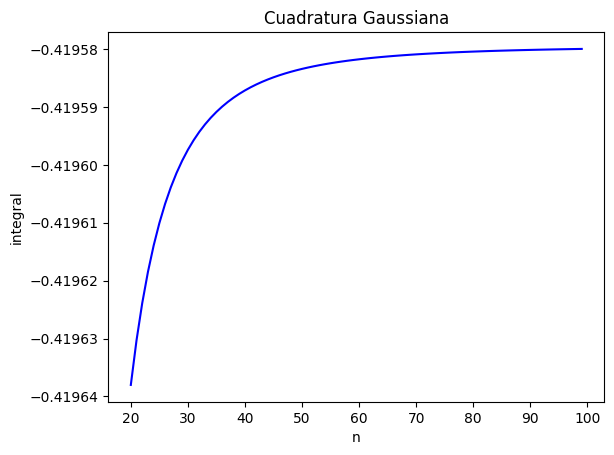

In [ ]:
n_conj = range(20, 100)

plt.plot(n_conj, [cuadratura_Gaussiana(f, 1, 4, n) for n in n_conj], "blue")



plt.title("Cuadratura Gaussiana")
plt.xlabel("n")
plt.ylabel("integral")

plt.show

Text(0, 0.5, 'y')

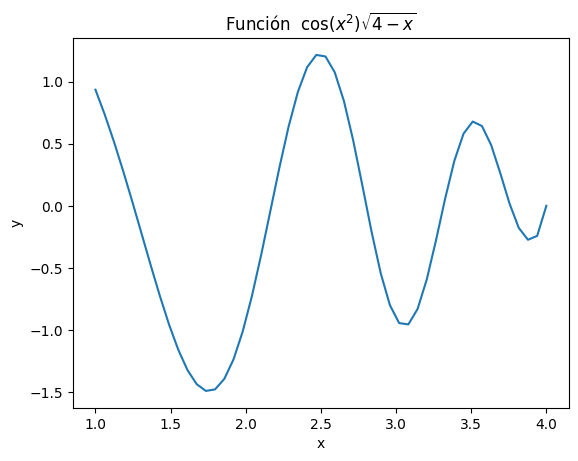

In [ ]:
x_conj = np.linspace(1, 4, 50)
plt.plot(x_conj, [f(x0) for x0 in x_conj])

plt.title("Función  $\cos (x^{2})\sqrt{4-x}$")
plt.xlabel("x")
plt.ylabel("y")


Podemos ver que con interpolación puede que no se estime el valor de la integral, si tenemos pocos puntos. Ya que tenemos muchas oscilaciones que con la interpolación podrían interpretarse como lineas que se unen en puntos intermedios de la grafica.

De modo que al tener mayor cantidad de puntos es posible aproximarse a la función de forma más precisa y así poder obtener la integral.